[Helix: A Vision-Language-Action Model for Generalist Humanoid Control](https://www.figure.ai/news/helix)

https://zhuanlan.zhihu.com/p/25263273644

# Introducing Helix
<!-- We're introducing Helix, a generalist Vision-Language-Action (VLA) model that unifies perception, language understanding, and learned control to overcome multiple longstanding challenges in robotics. Helix is a series of firsts:
- Full-upper-body control: Helix is the first VLA to output high-rate continuous control of the entire humanoid upper body, including wrists, torso, head, and individual fingers.
- Multi-robot collaboration: Helix is the first VLA to operate simultaneously on two robots, enabling them to solve a shared, long-horizon manipulation task with items they have never seen before.
- Pick up anything: Figure robots equipped with Helix can now pick up virtually any small household object, including thousands of items they have never encountered before, simply by following natural language prompts.
- One neural network: Unlike prior approaches, Helix uses a single set of neural network weights to learn all behaviors—picking and placing items, using drawers and refrigerators, and cross-robot interaction—without any task-specific fine-tuning.
- Commercial-ready: Helix is the first VLA that runs entirely onboard embedded low-power-consumption GPUs, making it immediately ready for commercial deployment. -->

我们推出了 Helix, 一个通用的视觉-语言-动作 (VLA) 模型, 它将感知、语言理解和学习控制统一起来, 以克服机器人领域的多个长期挑战。Helix 实现了一系列的首创:
- 整个上半身控制: Helix 是第一个输出整个人形上半身(包括手腕、躯干、头部和单个手指）高频连续控制的 VLA。
- 多机器人协作: Helix 是第一个同时在两个机器人上运行的 VLA, 使它们能够解决共同的、长时域的操作任务, 处理它们从未见过的物品。
- 拾取任何物品: 配备 Helix 的 Figure 机器人现在可以拾取几乎任何小型家用物品, 包括它们从未遇到过的成千上万种物品, 只需遵循自然语言提示。
- 一个神经网络: 与先前的方法不同, Helix 使用一组神经网络权重来学习所有行为 —— 拾取和放置物品、使用抽屉和冰箱以及跨机器人交互 —— 无需任何任务专用微调。
- 商业就绪: Helix 是第一个完全在嵌入式低功耗 GPU 上运行的 VLA, 可立即用于商业部署。

## New Scaling for Humanoid Robotics
<!-- The home presents robotics' greatest challenge. Unlike controlled industrial settings, homes are filled with countless objects–delicate glassware, crumpled clothing, scattered toys–each with unpredictable shapes, sizes, colors, and textures. For robots to be useful in households, they will need to be capable of generating intelligent new behaviors on-demand, especially for objects they've never seen before. -->

家庭是机器人面临的最大挑战。与受控的工业环境不同, 家里堆满了无数的物品 —— 精致的玻璃器皿、皱巴巴的衣服、散落的玩具 —— 每件物品都有不可预测的形状、大小、颜色和纹理。为了让机器人在家庭中发挥作用, 它们需要能够按需生成智能的新行为, 尤其是对它们从未见过的物体。

<!-- The current state of robotics will not scale to the home without a step change. Teaching robots even a single new behavior currently requires substantial human effort: either hours of PhD-level expert manual programming or thousands of demonstrations. Both are prohibitively expensive when we consider how vast the problem of the home truly is. -->

如果不进行重大变革, 目前的机器人技术无法扩展到家庭。目前, 即使教机器人一种新行为也需要大量的人力投入: 要么是数小时的博士级专家人工编程, 要么是数千次演示。当我们考虑到家庭问题到底有多么严重时, 这两种方法都是极其昂贵。

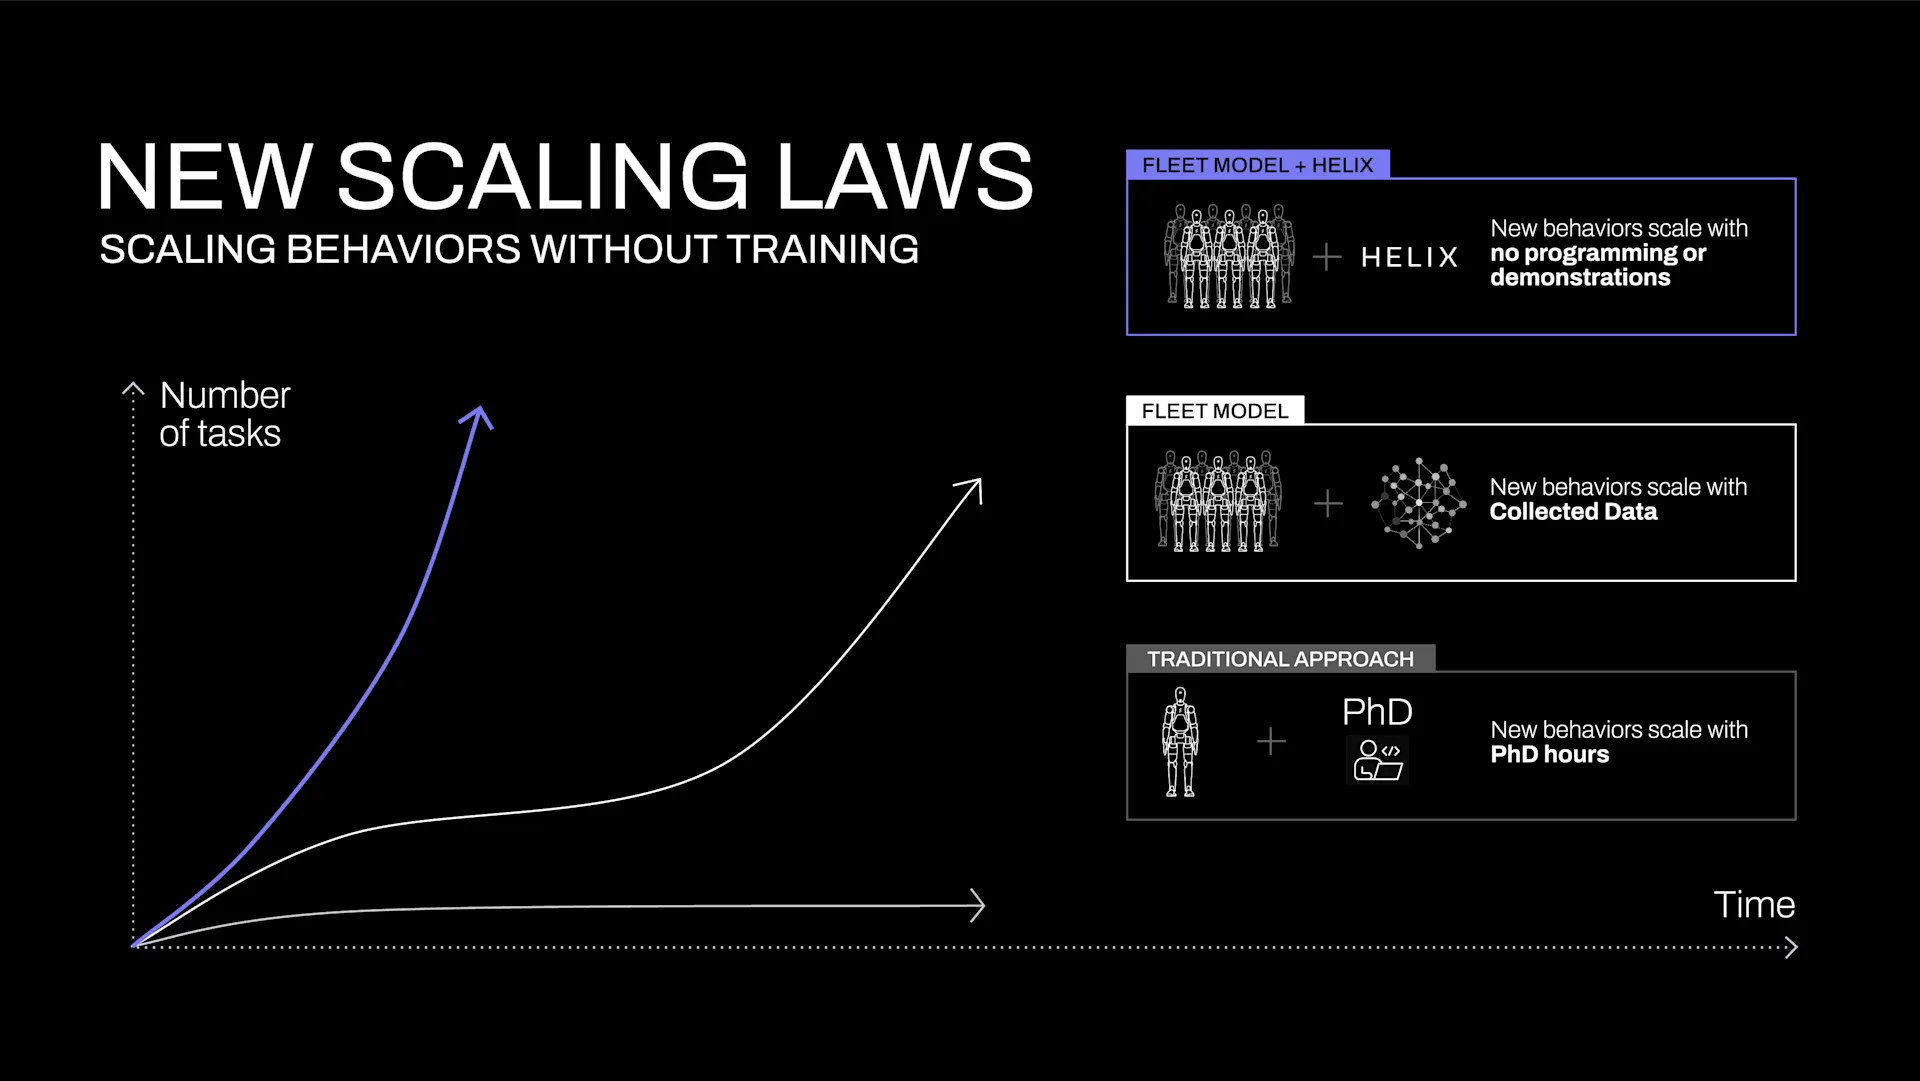
<!-- Figure 1: Scaling curves for different approaches to acquiring new robot skills. In conventional heuristic manipulation, skills grow with PhDs who manually script them. In conventional robot imitation learning, skills scale with data collected. With Helix, new skills can be specified on the fly with language. -->

图 1: 获取新机器人技能的不同方法的 Scaling 曲线。在传统的启发式操作中, 技能随着博士人工编写脚本而增长。在传统的机器人模仿学习中, 技能随着收集的数据而扩展。使用 Helix, 新技能可以通过语言即时指定。

<!-- But other domains of AI have mastered this kind of instant generalization. What if we could simply translate the rich semantic knowledge captured in Vision Language Models (VLMs) directly into robot actions? This new capability would fundamentally alter robotics' scaling trajectory (Figure 1). Suddenly, new skills that once took hundreds of demonstrations could be obtained instantly just by talking to robots in natural language. The key problem becomes: how do we extract all this common-sense knowledge from VLMs and translate it into generalizable robot control? We built Helix to bridge this gap. -->

但 AI 的其他领域已经掌握了这种即时泛化。如果我们能够简单地将视觉语言模型 (VLMs) 中捕获的丰富语义知识直接转化为机器人动作, 会怎么样？这种新能力将从根本上改变机器人的 scaling 轨迹(见图 1)。突然之间, 曾经需要数百次演示的新技能只需通过自然语言与机器人对话即可立即获得。关键问题是: 我们如何从 VLMs 中提取所有这些常识知识, 并将其转化为可泛化的机器人控制？我们构建了 Helix 来弥补这一差距。

# Helix: A "System 1, System 2" VLA for Whole Upper Body Control
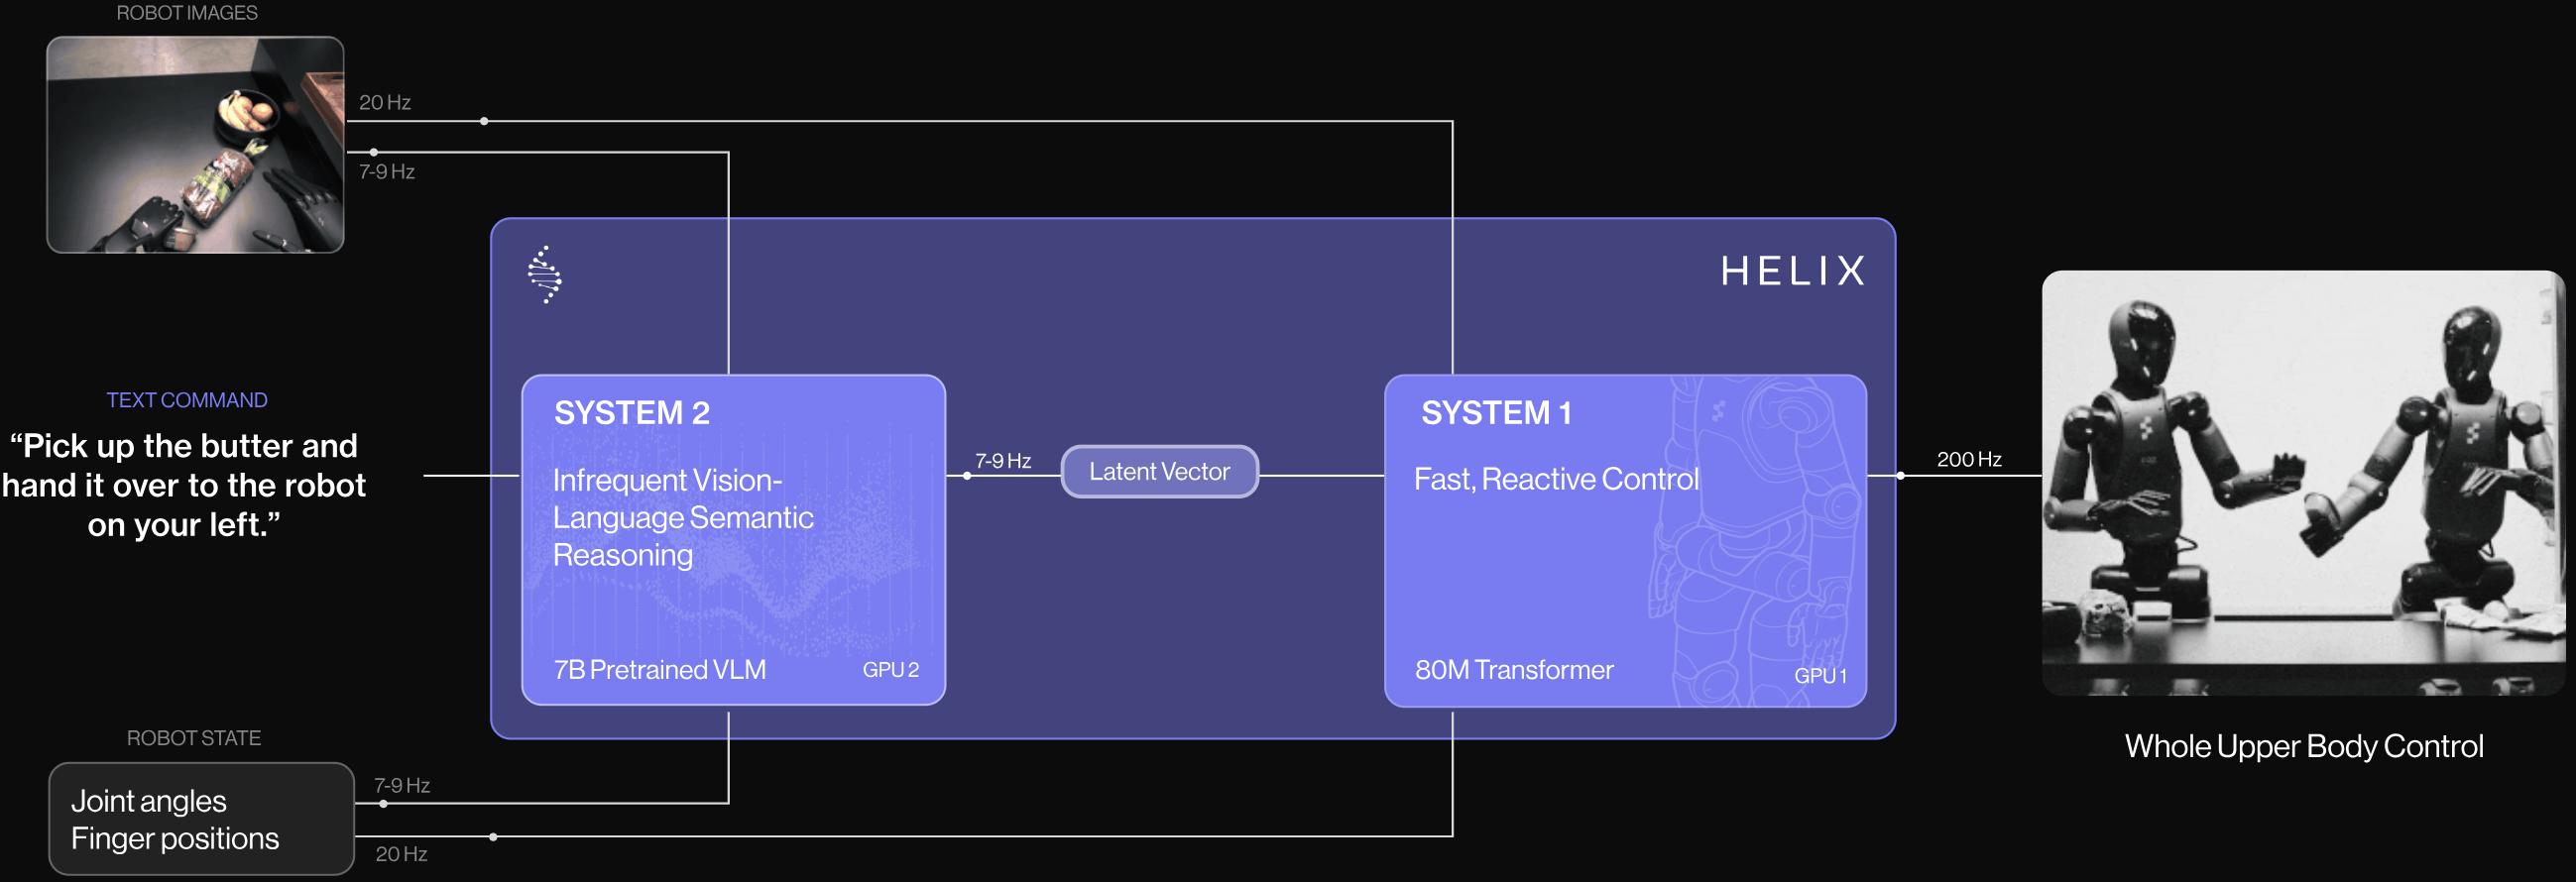

<!-- Helix is a first-of-its-kind "System 1, System 2" VLA model for high-rate, dexterous control of the entire humanoid upper body.  -->
Helix 是首个“系统 1、系统 2” VLA 模型, 用于整个人形上半身的高频率、灵巧控制。

<!-- Prior approaches face a fundamental tradeoff: VLM backbones are general, but not fast, and robot visuomotor policies are fast but not general. Helix resolves this tradeoff through two complementary systems, trained end-to-end to communicate:
- System 2 (S2): An onboard internet-pretrained VLM operating at 7-9 Hz for scene understanding and language comprehension, enabling broad generalization across objects and contexts.
- System 1 (S1): A fast reactive visuomotor policy that translates the latent semantic representations produced by S2 into precise continuous robot actions at 200 Hz. -->

先前的方法面临一个根本性的权衡: VLM 骨干是通用的, 但速度不快, 而机器人视觉运动策略速度快但不通用。Helix 通过两个互补系统解决了这一权衡, 这两个系统经过端到端训练以进行通信:
- 系统 2 (S2): 一个机载互联网预训练的 VLM, 以 7-9 Hz 运行, 用于场景理解和语言理解, 实现跨对象和上下文的广泛泛化。
- 系统 1 (S1): 一种快速反应的视觉运动策略, 将 S2 生成的 latent 语义表征转化为 200 Hz 的精确连续机器人动作。

<!-- This decoupled architecture allows each system to operate at its optimal timescale. S2 can "think slow" about high-level goals, while S1 can "think fast" to execute and adjust actions in real-time. For example, during collaborative behavior (see Video 2), S1 quickly adapts to the changing motions of a partner robot while maintaining S2's semantic objectives. -->

这种解耦架构允许每个系统在其最优时间尺度上运行。S2 可以“慢慢思考”上层目标, 而 S1 可以“快速思考”以实时执行和调整动作。例如, 在协作行为期间(见视频 2), S1 可以快速适应合作机器人不断变化的动作, 同时保持 S2 的语义目标。

<!-- Helix's design offers several key advantages over existing approaches:
- Speed and Generalization: Helix matches the speed of specialized single-task behavioral cloning policies while generalizing zero-shot to thousands of novel test objects.
- Scalability: Helix directly outputs continuous control for high-dimensional action spaces, avoiding complex action tokenization schemes used in prior VLA approaches, which have shown some success in low-dimensional control setups (e.g. binarized parallel grippers) but face scaling challenges with high-dimensional humanoid control.
- Architectural Simplicity: Helix uses standard architectures - an open source, open weight VLM for System 2 and a simple transformer-based visuomotor policy for S1.
- Separation of concerns: Decoupling S1 and S2 allows us to iterate on each system separately, without constraints of finding unified observation space or action representations. -->

与现有方法相比, Helix 的设计具有几个关键优势：
- 速度和泛化: Helix 的速度与专门的单任务行为克隆策略相匹配, 同时能够零样本泛化到数千个新测试对象。
- 可扩展性: Helix 直接输出高维动作空间的连续控制, 避免了先前 VLA 方法中使用的复杂 tokenization 标记方案, 这些方案在低维控制配置(如二进制并行夹爪)中取得一些成功, 但在高维人形控制中面临扩展挑战。
- 架构简单: Helix 使用标准架构 —— 系统 2 的开源、开放权重 VLM 和 S1 的基于 transformer 的简单视觉运动策略。
- 关注点分离: 将 S1 和 S2 解耦使我们能够分别迭代每个系统, 而不受寻找统一观察空间或动作表示的限制。

# Model and Training Details
## Data
<!-- We collect a high quality, multi-robot, multi-operator dataset of diverse teleoperated behaviors, ~500 hours in total. To generate natural language-conditioned training pairs, we use an auto-labeling VLM to generate hindsight instructions. The VLM processes segmented video clips from the onboard robot cameras, prompted with: "What instruction would you have given the robot to get the action seen in this video?" All items handled during training are excluded from evaluations to prevent contamination. -->

我们收集了一个高质量、多机器人、多操作员的不同远程操作行为数据集, 总共约 500 小时。为了生成自然语言条件训练对, 我们使用自动标注 VLM 来生成事后指令。VLM 处理来自机载机器人摄像头的分段视频剪辑, 并提示: “您将给机器人什么指令来执行此视频中看到的动作？”训练期间处理的所有物品均不纳入评估, 以防止污染。

## Architecture
<!-- Our system comprises two main components: S2, a VLM backbone, and S1, a latent-conditional visuomotor transformer. S2 is built on a 7B-parameter open-source, open-weight VLM pretrained on internet-scale data. It processes monocular robot images and robot state information (consisting of wrist pose and finger positions) after projecting them into vision-language embedding space. Combined with natural language commands specifying desired behaviors, S2 distills all semantic task-relevant information into a single continuous latent vector, passed to S1 to condition its low-level actions. -->

我们的系统由两个主要组件组成: S2, a VLM backbone 和 S1, a <font color="red">**latent-conditional visuomotor transformer**</font>。S2 建立在 7B 参数开源、开放权重的 VLM 上, 该 VLM 已在互联网规模数据上进行了预训练。它将单目机器人图像和机器人状态信息(包括手腕位姿和手指位置)投影到视觉语言嵌入空间后进行处理。结合指定所需行为的自然语言指令, S2 将所有与任务相关的语义信息提炼为单个连续 latent 向量, 并传递给 S1 以调节其下层动作。

<!-- S1, an 80M parameter cross-attention encoder-decoder transformer, handles low-level control. It relies on a fully convolutional, multi-scale vision backbone for visual processing, initialized from pretraining done entirely in simulation. While S1 receives the same image and state inputs as S2, it processes them at a higher frequency to enable more responsive closed-loop control. The latent vector from S2 is projected into S1's token space and concatenated with visual features from S1's vision backbone along the sequence dimension, providing task conditioning. -->

S1, 一个 80M 参数交叉注意力编码器-解码器 transformer, 处理下层控制。它依靠完全卷积、多尺度视觉骨干进行视觉处理, 该主干通过完全在模拟中完成的预训练进行初始化。虽然 S1 接收与 S2 相同的图像和状态输入, 但它以更高的频率处理它们, 以实现响应更快的闭环控制。来自 S2 的 latent 向量被投影到 S1 的词元空间中, 并沿着序列维度与来自 S1 视觉骨干的视觉特征拼接起来, 提供任务调节。

<!-- S1 outputs full upper body humanoid control at 200hz, including desired wrist poses, finger flexion and abduction control, and torso and head orientation targets. We append to the action space a synthetic "percentage task completion" action, allowing Helix to predict its own termination condition, which makes it easier to sequence multiple learned behaviors. -->

S1 以 200hz 的频率输出完整的上半身人形控制, 包括所需的手腕位姿、手指弯曲和外展控制, 以及躯干和头部的方向目标。我们在动作空间中添加一个合成的“任务完成百分比”动作, 使 Helix 能够预测其自身的终止条件, 从而更容易地序列化多个学到的行为。

## Training
<!-- Helix is trained fully end-to-end, mapping from raw pixels and text commands to continuous actions with a standard regression loss. Gradients are backpropagated from S1 into S2 via the latent communication vector used to condition S1's behavior, allowing joint optimization of both components. Helix requires no task-specific adaptation; it maintains a single training stage and single set of neural network weights without separate action heads or per-task fine-tuning stages. -->

Helix 经过完全端到端的训练, 从原始像素和文本命令映射到具有标准回归损失的连续动作。梯度通过用于调节 S1 行为的 latent 通信向量, 从 S1 反向传播到 S2, 允许两个组件的联合优化。Helix 无需针对特定任务进行调整; 它保留单个训练阶段和单组神经网络权重, 无需单独的动作头或每个任务的微调阶段。

<!-- During training, we add a temporal offset between S1 and S2 inputs. This offset is calibrated to match the gap between S1 and S2's deployed inference latency, ensuring that the real-time control requirements during deployment are accurately reflected in training. -->

在训练期间, 我们在 S1 和 S2 输入之间添加时间偏移, 该偏移经过校准, 以匹配 S1 和 S2 部署的推理延迟之间的差距, 确保部署期间的实时控制要求在训练中得以准确反映。

## Optimized Streaming Inference
<!-- Helix's training design enables efficient model parallel deployment on Figure robots, each equipped with dual low-power-consumption embedded GPUs. The inference pipeline splits across S2 (high-level latent planning) and S1 (low-level control) models, each running on dedicated GPUs. S2 operates as an asynchronous background process, consuming the latest observation (onboard camera and robot state) and natural language commands. It continuously updates a shared memory latent vector that encodes the high-level behavioral intent. -->

Helix 的训练设计支持在配备双低功耗嵌入式 GPU 的 Figure 机器人上实现高效的模型并行部署。推理流水线分为 S2(上层 latent 规划) 和 S1(下层控制) 模型, 每个模型都在专用 GPU 上运行。S2 作为异步后台进程运行, 使用最新的观察(机载摄像头和机器人状态)和自然语言指令。<font color="red">它不断更新一个共享内存 latent 向量, 该向量编码上层行为意图</font>。

<!-- S1 executes as a separate real-time process, maintaining the critical 200Hz control loop required for smooth whole upper body action. It takes both the latest observation and the most recent S2 latent vector. The inherent speed difference between S2 and S1 inference naturally results in S1 operating with higher temporal resolution on robot observations, creating a tighter feedback loop for reactive control.  -->

S1 作为单独的实时进程执行, 维持整个上身动作平稳所需的关键 200Hz 控制环路。它同时接收最新的观察和最近的 S2 latent 向量。S2 和 S1 推理之间的固有速度差异, 自然导致 S1 在机器人观察上以更高的时间分辨率运行, 从而为反应控制创建更紧密的反馈环路。

<!-- This deployment strategy deliberately mirrors the temporal offset introduced in training, minimizing the train-inference distribution gap. The asynchronous execution model allows both processes to run at their optimal frequencies, allowing us to run Helix as fast as our fastest single task imitation learning policies. -->

这种部署策略刻意反映了训练中引入的时间偏移, 最小化训练与推理之间的分布差距。异步执行模型允许两个进程以最佳频率运行, 使我们能够以与最快的单任务模仿学习策略相同的速度运行 Helix。

# Results

## Fine-grained VLA whole upper body control

<!-- Helix coordinates a 35-DoF action space at 200Hz, controlling everything from individual finger movements to end-effector trajectories, head gaze, and torso posture. Head and torso control pose unique challenges—as they move, they change both what the robot can reach and what it can see, creating feedback loops that have historically caused instability. Video 3 demonstrates this coordination in action: the robot smoothly tracks its hands with its head while adjusting its torso for optimal reach, all while maintaining precise finger control for grasping. Historically, achieving this level of precision with such a high-dimensional action space has been considered extremely challenging, even for a single known task. To our knowledge, no prior VLA system has demonstrated this degree of real-time coordination while maintaining the ability to generalize across tasks and objects. -->

Helix 以 200Hz 的频率协调 35 个自由度动作空间, 控制从单个手指运动到末端执行器轨迹、头部视线和躯干姿势。头部和躯干控制提出了独特的挑战 —— 随着它们的移动, 它们会改变机器人可以触及的范围和可以看到的范围, 从而产生反馈环路, 这在历史上曾导致不稳定。视频 3 演示了这种动作上的协调: 机器人用头部平滑地跟踪双手, 同时调整躯干以获得最优触及范围, 并保持精确的手指控制以进行抓取。历史上, 在如此高维的动作空间中实现这种精度水平被认为是极具挑战性的, 即使对于单个已知任务而言。据我们所知, 没有任何先前的 VLA 系统展示这种程度的实时协调, 同时保持跨任务和对象的泛化能力。

## Zero-shot multi-robot coordination

<!-- We push Helix to the limit in a challenging multi-agent manipulation scenario: collaborative zero-shot grocery storage between two Figure robots. Video 1 showcases two fundamental advances: The robots successfully manipulate entirely novel groceries—items never encountered during training—demonstrating robust generalization across diverse shapes, sizes, and materials. Additionally, both robots operate using identical Helix model weights, eliminating the need for robot-specific training or explicit role assignments. They achieve coordination through natural language prompts like "Hand the bag of cookies to the robot on your right" or "Receive the bag of cookies from the robot on your left and place it in the open drawer" (see Video 4). This marks the first demonstration of flexible, extended collaborative manipulation between multiple robots using a VLA, particularly significant given their successful handling of completely novel objects. -->

我们在一个具有挑战性的多智能体操作场景中将 Helix 推向极限: 两个 Figure 机器人之间的协作零样本食物存储。视频 1 展示了两个基本进步：机器人成功操作了全新的食物 —— 在训练期间从未遇到过的物品 —— 展示了对各种形状、大小和材料的强大泛化能力。此外, 两台机器人使用相同的 Helix 模型权重进行操作, 无需机器人专用训练或明确的角色分配。它们通过自然语言提示实现协调, 例如“将一袋饼干递给你右边的机器人”或“从你左边的机器人那里接过一袋饼干并将其放入打开的抽屉中” (参见视频 4)。这是首次展示使用 VLA 的多个机器人之间灵活、扩展的协作操作, 鉴于它们成功处理全新的物体, 这一点尤为重要。

## Emergent "Pick up anything"

<!-- We find that Figure robots equipped with Helix can pick up virtually any small household object with a simple "Pick up the [X]" command. In systematic testing, the robots successfully handled thousands of novel items in clutter—from glassware and toys to tools and clothing—without any prior demonstrations or custom programming. -->

我们发现, 配备 Helix 的 Figure 机器人可以通过简单的“拾起 [X]”命令几乎拾起任何小型家用物品。在系统测试中, 机器人成功处理了杂乱无章的数千件新物品 —— 从玻璃器皿和玩具到工具和衣物 —— 无需任何事先演示或自定义编程。

<!-- Particularly notable is how Helix bridges the gap between internet-scale language understanding and precise robot control. When prompted to "Pick up the desert item", for instance, Helix not only recognizes that a toy cactus matches this abstract concept, but also selects the closest hand and executes the precise motor commands needed to grasp it securely. -->

特别值得注意的是 Helix 如何弥补互联网规模语言理解与精确机器人控制之间的差距。例如, 当被提示“捡起沙漠物品”时, Helix 不仅识别出玩具仙人掌符合这一抽象概念, 还能选择最近的手, 并执行安全抓住它所需的精确运动命令。

<!-- This general-purpose "language-to-action" grasping capability opens new exciting new possibilities for humanoid deployment in unstructured environments. -->

这种通用的“语言到动作”抓取能力为在非结构化环境中部署人形机器人开辟了令人兴奋的新可能性。

# Discussion

## Helix's training is highly efficient

<!-- Helix achieves strong object generalization with remarkably few resources. We train Helix with ~500 hours of high quality supervised data in total, a small fraction of the size of previously collected VLA datasets (<5%), and without any dependencies around multi-robot-embodiment collect or multiple stages of training. We note that this is a scale of collect more comparable to modern single-task imitation learning datasets. Despite this comparatively small data requirement, Helix scales to the significantly more challenging action space of full upper body humanoid control, with high-rate, high-dimensional outputs. -->

Helix 以极少的资源实现强大的物体泛化。我们总共使用约 500 小时的高质量监督数据, 训练 Helix, 这仅是之前收集的 VLA 数据集规模的一小部分(<5%), 并且不依赖于多机器人具身收集或多训练阶段。我们注意到, 这种收集规模更接近于现代单任务模仿学习数据集。尽管数据需求相对较小, Helix 仍能扩展到全上半身人形控制的更具挑战性的动作空间, 具有高速率、高维度的输出。

## A single set of weights

<!-- Existing VLA systems often require specialized fine-tuning or dedicated action heads to optimize performance across different high-level behaviors. Remarkably, Helix achieves strong performance across diverse tasks with a single unified model. Using just one set of neural network weights (7B for System 2, 80M for System 1), Helix picks and places items in various containers, operates drawers and refrigerators, coordinates dexterous multi-robot handovers, and manipulates thousands of novel objects. -->

现有的 VLA 系统通常需要专门的微调或专用的动作头, 以优化不同上层行为的性能。值得注意的是, Helix 使用一个统一的模型在不同任务中实现了强大性能。仅使用一组神经网络权重(系统 2 为 7B, 系统 1 为 80M), Helix 能在各种容器中拾取和放置物品、操作抽屉和冰箱、协调灵巧的多机器人交接, 并操纵数千个新物体。

# Conclusion
<!-- We have presented Helix, the first Vision-Language-Action model to directly control an entire humanoid upper body from natural language. Unlike earlier robot systems, Helix is capable of generating long-horizon, collaborative, dexterous manipulation on the fly without any task-specific demonstrations or extensive manual programming. Helix displays strong object generalization, being able to pick up thousands of novel household items with varying shapes, sizes, colors, and material properties never encountered before in training, simply by asking in natural language. This represents a transformative step forward in how Figure scales humanoid robot behaviors—one that we believe will be pivotal as our robots increasingly assist in everyday home environments. -->

我们提出了 Helix, 第一个通过自然语言直接控制整个人形机器上半身的视觉-语言-动作模型。与早期的机器人系统不同, Helix 能够即时生成长时域、协作、灵巧操作, 而无需任何任务专用演示或大量的人工编程。Helix 展现出强大的物体泛化能力, 仅通过自然语言提问, 能够拾取数千种在训练中从未遇到过的形状、大小、颜色和材料特性各异的新家居物品。这标志着 Figure 在扩展人形机器人行为上向前迈出的变革一步 —— 我们相信, 随着我们的机器人越来越多地协助日常家庭环境, 这一点将成为关键。

<!-- While these early results are truly exciting, we think they only scratch the surface of what is possible. We are eager to see what happens when we scale Helix by 1,000x and beyond. If you’re as fascinated by the possibilities of Helix—and the future of dexterous humanoid robotics, we invite you to join us on this journey. -->

尽管这些早期成果确实令人兴奋, 但我们认为这仅仅是可能性的冰山一角。我们迫切希望看到当我们将 Helix 扩大 1,000 倍甚至更多时会发生什么。如果您对 Helix 的可能性以及灵巧人形机器人的未来同样着迷, 我们邀请您加入我们的旅程。